In [1]:
!pwd

/content


In [6]:
%cd 'drive/MyDrive/Colab Notebooks/23.12.18딥러닝'

/content/drive/MyDrive/Colab Notebooks/23.12.18딥러닝


#### 학습 목표
- 소리 데이터를 처리하고 분석하는 방법을 알아보자.
- 아기 울음소리를 분류해보자
  - wav 데이터 Dense 층으로 학습
  - wav 데이터 Conv1D 층으로 학습
- STT(Speech to Text)
- TTS(Text to Speech)

- 아기 울음 소리 데이터 압축 풀기

In [5]:
import zipfile

# zip_file 경로 설정
zip_dir = './data/baby_sound.zip'

# 압축 해제
with zipfile.ZipFile(zip_dir,"r") as zip_ref :
  zip_ref.extractall('./data/baby_sound')
  zip_ref.close()


### librosa
- 음악 및 오디오 신호 처리를 위한 파이썬 라이브러리
- 음악 분석 & 오디오 신호 변환 및 기타 오디오 처리작업을 수행하기 위한 다양한 기능을 제공
- 많은 머신러닝 및 딥러닝 모델에서 음악 분석 및 처리를 위해 사용되며, 음악 정보검색, 음악 생성 및 추천 시스템과 같은 다양한 분야에서 응용

In [1]:
# 라이브러리 설치
!pip install librosa

In [8]:
# 라이브러리 import
import librosa
import librosa.display
from matplotlib import pyplot as plt
import numpy as np
import IPython.display

# 소리 데이터 불러오기
# wav : 사운드 데이터 (시간에 따른 진폭 (소리의 크기값))
# sr(sampling rate) : 초당 소리 데이터의 수
wav, sr= librosa.load('/content/drive/MyDrive/Colab Notebooks/23.12.18딥러닝/data/test_voice.wav')

print(f"wav:{wav.shape}")
print(f"sr:{sr}")
print(f"플레이 시간:{wav.shape[0]/sr}초")


wav:(67253,)
sr:22050
플레이 시간:3.0500226757369613초


In [9]:
IPython.display.Audio(data=wav,rate=sr)

- 소리데이터 시각화


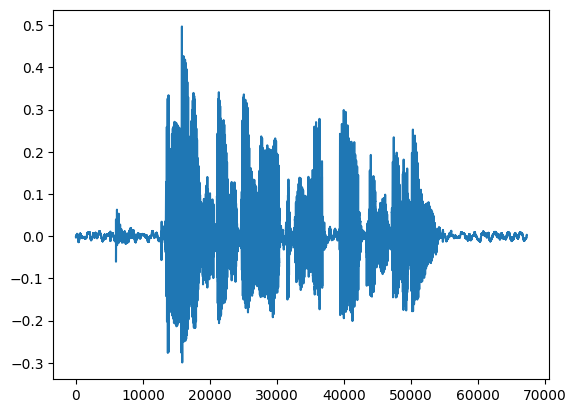

In [10]:
plt.plot(wav)
plt.show()

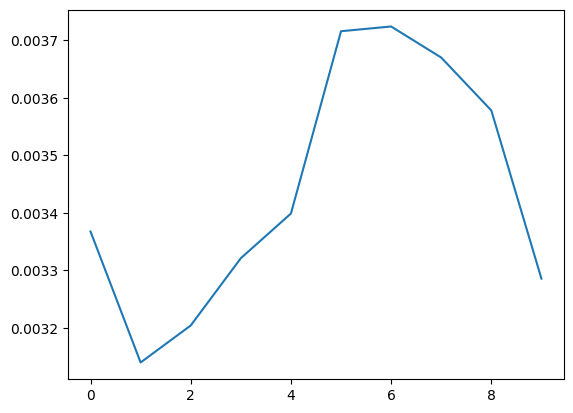

In [16]:
plt.plot(wav[10000:10010])
plt.show()

- 소리데이터를 분석하는 방법
  - wav 데이터 : 진폭(소리의 크기), 초당 진동수, 주기별 파형의 모양(심박 등)
  - 진폭 데이터에는 소리의 특성을 충분히 담기 어렵다.
  - 진동/진폭 -> 주파수로 변환
  - 주파수 : 1/주기, Hz
  - 고음 (고주파수) : 초당 진동수가 높은 형태
  - 저음 (저주파수) : 초당 진동수가 낮은 형태
  - 인간은 저음을 잘 인지 한다. 고음은 잘 인지 못함
- 음성의 주파수
  - 사람의 성대 구조나 말에 따라 다른 주파수 성분을 가지고 있다 -> 음성 인식

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=500
  warnings.warn(


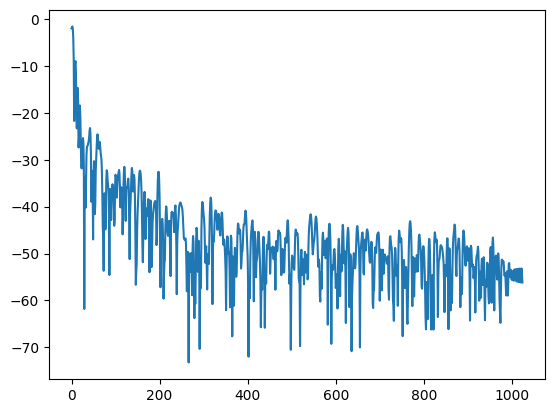

In [17]:
# 소리데이터를 주파수 데이터로 변환
# stft():푸리의 변환 - 소리 데이터를 가지고 주파수의 개수를 세줌 / 해당하는 주파수가 몇개나 있는지 체크
dB = librosa.amplitude_to_db(np.abs(librosa.stft(wav[10000:10500])))
plt.plot(dB.flatten())
plt.show()

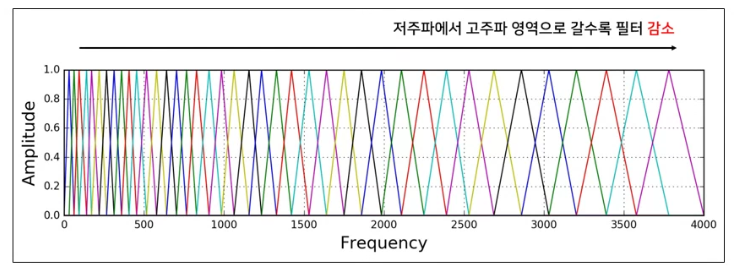

- Mel Spectrum
  - 사람의 귀가 저주파는 잘 듣고 곧주파는 잘 못듣는 특성을 반영
  - 저주파는 샘플링 수를 많이 해주고, 고주파는 샘플링 수를 적게 해주는 방법
- 멜스펙트럼 시각화 : 소리 데이터를 이미지로 변환

(128, 132)


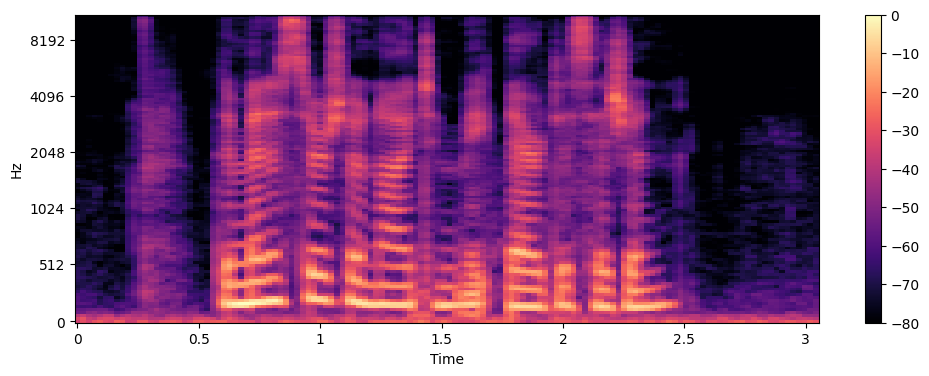

In [21]:
# n_mels=128: 멜스펙트럼의 y축 눈금수 (주파수를 몇단계로 구분할 것인지 설정)
S=librosa.feature.melspectrogram(y=wav, sr=sr,n_mels=128)

print(S.shape)
log_S=librosa.power_to_db(S,ref=np.max)

plt.figure(figsize=(12,4))
librosa.display.specshow(log_S,sr=sr,x_axis='time',y_axis='mel')

plt.colorbar()
plt.show()

(128, 6258)


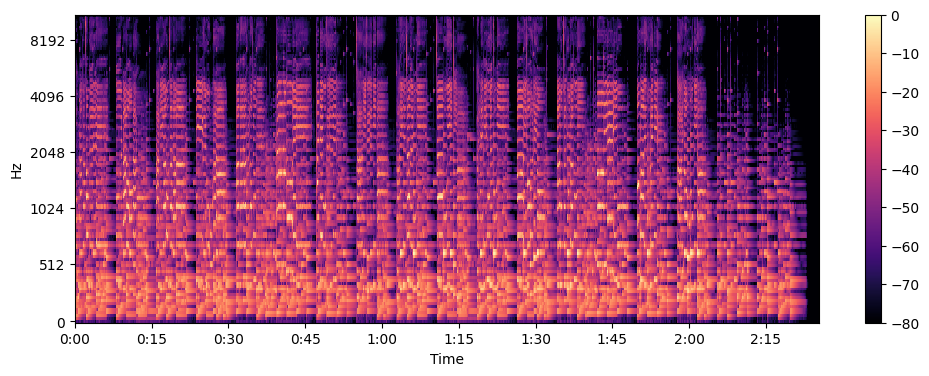

In [22]:
# 섬집 아기 데이터를 멜 스펙트로그램으로 시각화
wav,sr=librosa.load("/content/drive/MyDrive/Colab Notebooks/23.12.18딥러닝/data/섬집아기.wav")
S=librosa.feature.melspectrogram(y=wav, sr=sr,n_mels=128)

print(S.shape)
log_S=librosa.power_to_db(S,ref=np.max)

plt.figure(figsize=(12,4))
librosa.display.specshow(log_S,sr=sr,x_axis='time',y_axis='mel')

plt.colorbar()
plt.show()

(128, 6776)


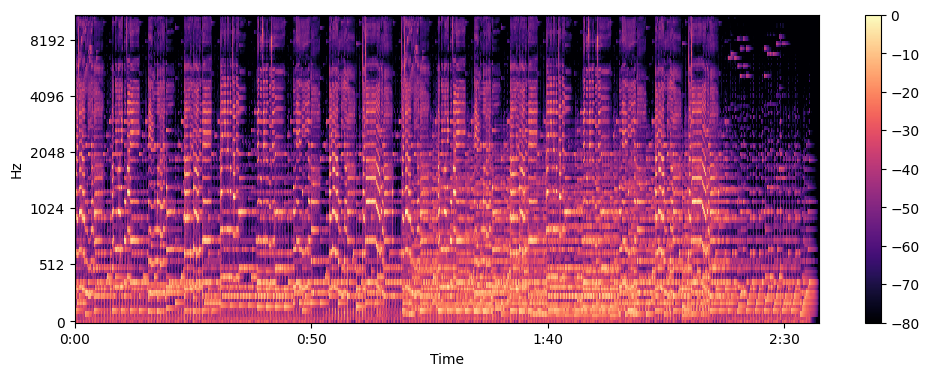

In [23]:
wav,sr=librosa.load("/content/drive/MyDrive/Colab Notebooks/23.12.18딥러닝/data/모차르트자장가.wav")
S=librosa.feature.melspectrogram(y=wav, sr=sr,n_mels=128)

print(S.shape)
log_S=librosa.power_to_db(S,ref=np.max)

plt.figure(figsize=(12,4))
librosa.display.specshow(log_S,sr=sr,x_axis='time',y_axis='mel')

plt.colorbar()
plt.show()

- MFCC
  - 멜스펙트로그램을 디지털화 시켜준 것

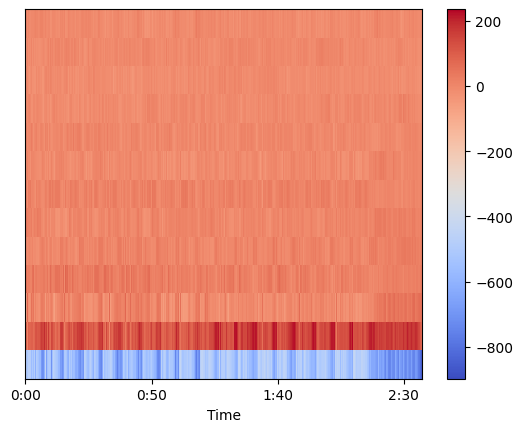

In [26]:
# n_mfcc =13 : 몇단계로 디지털화 시켜 줄 것인가?
mfcc=librosa.feature.mfcc(S=log_S,n_mfcc=13)

librosa.display.specshow(mfcc,sr=sr,x_axis='time')
plt.colorbar()
plt.show()

### STT(Speech to Text)

In [27]:
# 라이브러리 설치
!pip install SpeechRecognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 45.9 MB/s eta 0:00:00


In [28]:
import speech_recognition as sr

re=sr.Recognizer()

with sr.AudioFile("./data/test_voice.wav") as source:
  audio=re.record(source)

  text = re.recognize_google(audio)
  print(text)

the ministers are not to make their decision


In [29]:
import speech_recognition as sr

re=sr.Recognizer()

with sr.AudioFile("/content/drive/MyDrive/Colab Notebooks/23.12.18딥러닝/data/모차르트자장가.wav") as source:
  audio=re.record(source)

  # language = 'ko-KR': 한글 인식
  text = re.recognize_google(audio,language = 'ko-KR')
  print(text)

잘 자라 우리 아가 앞뜰과 뒷동산에 새들도 아가 양도 다들 자는데 달리는 영창으로 흰 구슬 꿈 꾸세요 보내느니 한 번 잘 자라 우리 아가 잘 자거라 잘 자라 우리 아가 앞뜰과 뒷동산에 새들도 아가야 또 다들 자는데 달님은 영창으로 앵무새 꿈 꾸세요 보내느니 이런 마음 잘 자라 우리 아가 잘 자거라


### TTS(Text to Speech)

In [30]:
!pip install gTTS

In [34]:
from gtts import gTTS

text= "야옹"

tts=gTTS(text=text,lang='ko')

tts.save('./data/tts.mp3')

IPython.display.Audio('./data/tts.mp3')

### 아기 울음소리 분류
- 사운드 데이터의 길이를 동일하게 맞춰줘야 한다.
  - pad1d(): 1차원의 wav 데이터의 길이를 맞춰주는 함수
  - pad2d(): 2차원의 mfcc 데이터 길이를 맞추는 함수

In [36]:
import numpy as np

# wav : 소리데이터, i : 길이
def pad1d(wav,i) :
  # 소리데이터의 길이가 i보다 크다면
  if wav.shape[0]>i:
    # 해당 길이만큼 슬라이싱 해서 변환
    return wav[:i]

  # 소리데이터의 길이가 i보다 작다면
  elif wav.shape[0] < i :
    # 부족한 길이만큼 0으로 채워서 반환
    return np.hstack((wav,np.zero(i-wav.shape[0])))

In [37]:
import numpy as np

# wav : 소리데이터, i : 길이
def pad2d(wav,i) :
  # 소리데이터의 길이가 i보다 크다면
  # 행은 0번 접근, 열은 1번 접근
  if wav.shape[1]>i:
    # 해당 길이만큼 슬라이싱 해서 변환
    return wav[:,:i]

  # 소리데이터의 길이가 i보다 작다면
  elif wav.shape[1] < i :
    # 부족한 길이만큼 0으로 채워서 반환
    return np.hstack((wav,np.zero((wav.shape[0],i-wav.shape[1]))))

In [41]:
# 소리데이터로 학습 데이터 만들어주기
import os
import librosa

X_train=[]
y_train=[]

# train에 있는 소리파일들을 하나씩 읽어온다.
# 파일명 구조 : crying (1).mp3
for fname in os.listdir('./data/baby_sound/train'):
  # 빈 공백으로 분리하고 첫 번째 인덱스를 라벨 데이터로 저장
  label=fname.split(" ")[0]
  y_train.append(label)

  # 소리 데이터를 읽어와서 wav를 같은 길이로 만들어주자
  wav,sr=librosa.load("./data/baby_sound/train/"+fname)
  wav=pad1d(wav,30000)
  X_train.append(wav)


In [42]:
# 소리데이터로 학습 데이터 만들어주기
import os
import librosa

X_test=[]
y_test=[]

# train에 있는 소리파일들을 하나씩 읽어온다.
# 파일명 구조 : crying (1).mp3
for fname in os.listdir('./data/baby_sound/test'):
  # 빈 공백으로 분리하고 첫 번째 인덱스를 라벨 데이터로 저장
  label=fname.split(" ")[0]
  y_test.append(label)

  # 소리 데이터를 읽어와서 wav를 같은 길이로 만들어주자
  wav,sr=librosa.load("./data/baby_sound/test/"+fname)
  wav=pad1d(wav,30000)
  X_test.append(wav)


In [47]:
len(X_train),len(y_train),len(X_test),len(y_test),len(X_train[0]),len(X_test[0])

(169, 169, 89, 89, 30000, 30000)

- 리스트로 만들어진 데이터를 배열로 변환

In [48]:
X_train = np.vstack(X_train)
X_test = np.vstack(X_test)

X_train.shape,X_test.shape


((169, 30000), (89, 30000))

In [ ]:
# 정답 데이터 원핫 인코딩

In [50]:
import pandas as pd

y_train_en=pd.get_dummies(y_train)
y_test_en=pd.get_dummies(y_test)
y_train_en.shape,y_test_en.shape

((169, 3), (89, 3))

### 신경망 학습 - Dense층만 이용
- MLP(Multy Layer Perceptron)

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 뼈대 생성
model1=Sequential()
model1.add(Dense(128,activation='relu',input_shape=(30000, )))
model1.add(Dense(64,activation='relu'))
model1.add(Dense(32,activation='relu'))
model1.add(Dense(3,activation='softmax'))

In [52]:
model1.compile(loss='categorical_crossentropy',
               optimizer = 'Adam',
               metrics=['accuracy']
               )

In [ ]:
h1=model1.fit(X_train,y_train_en,epochs=100,batch_size=32,validation_data=(X_test,y_test_en))

In [54]:
# 예측
pred=model1.predict(X_test)

idx=60
print(y_test_en.iloc[idx])
print(pred[idx])

3/3 [==============================] - 0s 9ms/step
crying     0
laugh      0
silence    1
Name: 60, dtype: uint8
[0.00130593 0.00514047 0.99355364]


### Conv1D를 이용한 학습
- Conv1D는 1차원 데이터의 앞 뒤의 값들의 특성을 추출해서 특성 맵을 생성
- CNN을 이용하기 위해서는 차원 추가가 필요하다

In [58]:
# expand_dims(차원을 확장시켜줄 데이터, 새로 추가 될 차원의 위치)
# -1을 사용하면 맨 마지막 차원이 추가된다.
X_train=np.expand_dims(X_train,-1)
X_test=np.expand_dims(X_test,-1)

X_train.shape,X_test.shape

((169, 30000, 1, 1), (89, 30000, 1))

In [62]:
# Conv1D 신경망 설계
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D,MaxPooling1D,Flatten,Dense
from tensorflow.keras.layers import GlobalAveragePooling1D


# kerner_size = 1차원 필터
model2 = Sequential()
model2.add(Conv1D(filters = 64,kernel_size=3, activation='relu', input_shape=(30000,1)))
model2.add(Conv1D(filters = 64,kernel_size=3, activation='relu'))
model2.add(MaxPooling1D(pool_size = 3))
model2.add(Conv1D(filters = 128,kernel_size=3, activation='relu', input_shape=(30000,1)))
model2.add(Conv1D(filters = 128,kernel_size=3, activation='relu'))
model2.add(GlobalAveragePooling1D())

model2.add(Dense(3, activation='softmax'))

In [63]:
model2.compile(loss='categorical_crossentropy',
               optimizer = 'Adam',
               metrics=['accuracy']
               )

In [64]:
h2=model2.fit(X_train,y_train_en,epochs=100,batch_size=32,validation_data=(X_test,y_test_en))


Epoch 1/100
6/6 [==============================] - 8s 545ms/step - loss: 1.0839 - accuracy: 0.5799 - val_loss: 1.0397 - val_accuracy: 0.5955
Epoch 2/100
6/6 [==============================] - 1s 165ms/step - loss: 1.0210 - accuracy: 0.5680 - val_loss: 0.9060 - val_accuracy: 0.6966
Epoch 3/100
6/6 [==============================] - 1s 198ms/step - loss: 0.9062 - accuracy: 0.6095 - val_loss: 0.7407 - val_accuracy: 0.7753
Epoch 4/100
6/6 [==============================] - 1s 162ms/step - loss: 0.7742 - accuracy: 0.7041 - val_loss: 0.5859 - val_accuracy: 0.8427
Epoch 5/100
6/6 [==============================] - 1s 162ms/step - loss: 0.6299 - accuracy: 0.7751 - val_loss: 0.4023 - val_accuracy: 0.8764
Epoch 6/100
6/6 [==============================] - 1s 162ms/step - loss: 0.5036 - accuracy: 0.8107 - val_loss: 0.2997 - val_accuracy: 0.8539
Epoch 7/100
6/6 [==============================] - 1s 163ms/step - loss: 0.4697 - accuracy: 0.8225 - val_loss: 0.2714 - val_accuracy: 0.8876
Epoch 8/100
6

In [65]:
# 예측
pred=model2.predict(X_test)

idx=60
print(y_test_en.iloc[idx])
print(pred[idx])

3/3 [==============================] - 0s 63ms/step
crying     0
laugh      0
silence    1
Name: 60, dtype: uint8
[8.6715221e-07 1.2148457e-03 9.9878424e-01]


### MFCC + Conv2D를 이용한 소리데이터 분류
- 소리파일에서

In [72]:
import numpy as np

# wav : 소리데이터, i : 길이
def pad1d(wav, i) :
  # 소리데이터의 길이가 i보다 크다면
  if wav.shape[0] > i :
  # 해당 길이만큼 슬라이싱 해서 변환
    return wav[:i]
  # 소리데이터의 길이가 i보다 작다면
  elif wav.shape[0] < i :
    # 부족한 길이만큼 0으로 채워서 반환
    return np.hstack((wav, np.zero(i-wav.shape[0])))


def pad2d(wav, i) :
  # 소리데이터의 길이가 i보다 크다면
  # 행은 0번 접근, 열은 1번 접근
  if wav.shape[1] > i :
  # 해당 길이만큼 슬라이싱 해서 변환
    return wav[ : , : i ]
  # 소리데이터의 길이가 i보다 작다면
  elif wav.shape[1] < i :
    # 부족한 길이만큼 0으로 채워서 반환
    return np.hstack((wav, np.zero((wav.shape[0], i-wav.shape[1]))))

In [73]:
# 소리데이터로 학습 데이터 만들어주기
import os
import librosa

X_train=[]
y_train=[]

# train에 있는 소리파일들을 하나씩 읽어온다.
# 파일명 구조 : crying (1).mp3
for fname in os.listdir('./data/baby_sound/train'):
  # 빈 공백으로 분리하고 첫 번째 인덱스를 라벨 데이터로 저장
  label=fname.split(" ")[0]
  y_train.append(label)

  # 소리 데이터를 읽어와서 wav를 같은 길이로 만들어주자
  wav,sr=librosa.load("./data/baby_sound/train/"+fname)

  # wav 데이터를 읽어와서 ㅡㄹㅊㅊfh qui
  S=librosa.feature.melspectrogram(y=wav,sr=sr,n_mels=128)
  log_S=librosa.power_to_db(S,ref=np.max)
  mfcc1=librosa.feature.mfcc(S=log_S,n_mfcc=20)

  # mfcc 데이터를 40길이로 padding
  mfcc2=pad2d(mfcc1,40)
  X_train.append(mfcc2)


In [74]:
# 소리데이터로 학습 데이터 만들어주기
import os
import librosa

X_test=[]
y_test=[]

# train에 있는 소리파일들을 하나씩 읽어온다.
# 파일명 구조 : crying (1).mp3
for fname in os.listdir('./data/baby_sound/test'):
  # 빈 공백으로 분리하고 첫 번째 인덱스를 라벨 데이터로 저장
  label=fname.split(" ")[0]
  y_test.append(label)

  # 소리 데이터를 읽어와서 wav를 같은 길이로 만들어주자
  wav,sr=librosa.load("./data/baby_sound/test/"+fname)

  # wav 데이터를 읽어와서 ㅡㄹㅊㅊfh qui
  S=librosa.feature.melspectrogram(y=wav,sr=sr,n_mels=128)
  log_S=librosa.power_to_db(S,ref=np.max)
  mfcc1=librosa.feature.mfcc(S=log_S,n_mfcc=20)

  # mfcc 데이터를 40길이로 padding
  mfcc2=pad2d(mfcc1,40)
  X_test.append(mfcc2)


In [76]:
# 리스트를 배열로 변환
X_train=np.array(X_train)
X_test=np.array(X_test)

X_train.shape,X_test.shape


((169, 20, 40), (89, 20, 40))

In [78]:
# 라벨데이터 원핫 인코딩
y_train=pd.get_dummies(y_train)
y_test=pd.get_dummies(y_test)

y_train.shape,y_test.shape

((169, 3), (89, 3))

In [79]:
# CNN 입력 데이터로 쓰기 위해서 색상차원을 추가
X_train=np.expand_dims(X_train,-1)
X_test=np.expand_dims(X_test,-1)

X_train.shape,X_test.shape


((169, 20, 40, 1), (89, 20, 40, 1))

### CNN 설계

In [82]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,Flatten
from tensorflow.keras.layers import Dropout,GlobalAveragePooling2D

model3=Sequential()

model3.add(Conv2D(32,(3,3),activation='relu',input_shape=(20,40,1)))
model3.add(GlobalAveragePooling2D())

model3.add(Dense(128,activation='relu'))
model3.add(Dense(64,activation='relu'))
model3.add(Dense(32,activation='relu'))
model3.add(Dense(3,activation='softmax'))

model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 18, 38, 32)        320       
                                                                 
 global_average_pooling2d_1  (None, 32)                0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_5 (Dense)             (None, 128)               4224      
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 3)                 99        
                                                      

In [83]:
# 컴파일
model3.compile(loss='categorical_crossentropy',
               optimizer = 'Adam',
               metrics=['accuracy']
               )

In [84]:
# 학습
from tensorflow.keras.callbacks import ModelCheckpoint

mc = ModelCheckpoint('./model/sound_{epoch:3d}_{accuracy:.2f}_{val_accuracy:.2f}.hdf5',
                     monitor='val_accuracy', save_best_only=True)

h3 = model3.fit(X_train, y_train, epochs=5, batch_size=32,
                validation_data=(X_test, y_test),
                callbacks=[mc])

Epoch 1/5
6/6 [==============================] - 3s 78ms/step - loss: 0.6798 - accuracy: 0.7811 - val_loss: 0.3785 - val_accuracy: 0.9551
Epoch 2/5
6/6 [==============================] - 0s 11ms/step - loss: 0.3242 - accuracy: 0.8580 - val_loss: 0.2832 - val_accuracy: 0.9326
Epoch 3/5
1/6 [====>.........................] - ETA: 0s - loss: 0.2449 - accuracy: 0.9688

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 18ms/step - loss: 0.2372 - accuracy: 0.9586 - val_loss: 0.1556 - val_accuracy: 0.9663
Epoch 4/5
6/6 [==============================] - 0s 15ms/step - loss: 0.1937 - accuracy: 0.9053 - val_loss: 0.3064 - val_accuracy: 0.8539
Epoch 5/5
6/6 [==============================] - 0s 12ms/step - loss: 0.1450 - accuracy: 0.9763 - val_loss: 0.1401 - val_accuracy: 0.9551


In [85]:
# 예측
pred=model3.predict(X_test)
idx=19
print(pred[idx])
print(y_test.iloc[idx])

3/3 [==============================] - 0s 10ms/step
[0.25499874 0.73980546 0.00519584]
crying     0
laugh      1
silence    0
Name: 19, dtype: uint8
